In [1]:
import requests as library

In [2]:
url = 'https://api.covid19api.com/dayone/country/brazil'
answer = library.get(url)

In [3]:
answer.status_code

200

In [4]:
raw_data = answer.json()

In [5]:
raw_data[0]

{'ID': '63aa488e-b4a2-4fcd-ae15-07c1ff219903',
 'Country': 'Brazil',
 'CountryCode': 'BR',
 'Province': '',
 'City': '',
 'CityCode': '',
 'Lat': '-14.24',
 'Lon': '-51.93',
 'Confirmed': 1,
 'Deaths': 0,
 'Recovered': 0,
 'Active': 1,
 'Date': '2020-02-26T00:00:00Z'}

In [6]:
end_data = []
for comments in raw_data:
    end_data.append([comments['Country'], comments['CountryCode'], comments['Confirmed'], comments['Deaths'], comments['Recovered'], comments['Active'], comments['Date']])

In [7]:
end_data.insert(0, ['pais', 'codigo_pais', 'confirmados', 'obitos', 'recuperados', 'ativos', 'data'])

In [8]:
PAIS = 0
CODIGO_PAIS = 1
CONFIRMADOS = 2
OBITOS = 3
RECUPERADOS = 4
ATIVOS = 5
DATA = 6

In [9]:
for i in range(1, len(end_data)):
    end_data[i][DATA] = end_data[i][DATA][:10]

In [10]:
import datetime as dt

In [11]:
import csv

In [12]:
with open('brasil_covid.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerows(end_data)

In [13]:
for i in range(1, len(end_data)):
    end_data[i][DATA] = dt.datetime.strptime(end_data[i][DATA], '%Y-%m-%d')

In [14]:
def get_datasets(y, labels):
    if type(y[0]) == list:
        datasets = []
        for i in range(len(y)):
            datasets.append({
                'label': labels[i],
                'data': y[i]
            })
        return datasets
    else:
        return [
            {
                'label': labels[0],
                'data': y
                
            }
        ]

In [15]:
def set_title(title=''):
    if title != '':
        display = 'true'
    else:
        display = 'false'
    return{
        'title': title,
        'display': display
    }

In [16]:
def create_chart(x, y, labels, kind='bar', title=''):
    
    datasets = get_datasets(y, labels)
    options = set_title(title)
    
    chart = {
        'type': kind,
        'data': {
            'labels': x,
            'datasets': datasets
        },
        'options': options
    }
    return chart

In [17]:
def get_api_chart(chart):
    url_base= 'https://quickchart.io/chart'
    answer = library.get(f'{url_base}?c={str(chart)}')
    return answer.content

In [18]:
def save_image(path, content):
    with open(path, 'wb') as image:
        image.write(content)

In [19]:
from PIL import Image
from IPython.display import display

In [20]:
def display_image(path):
    img_pil = Image.open(path)
    display(img_pil)

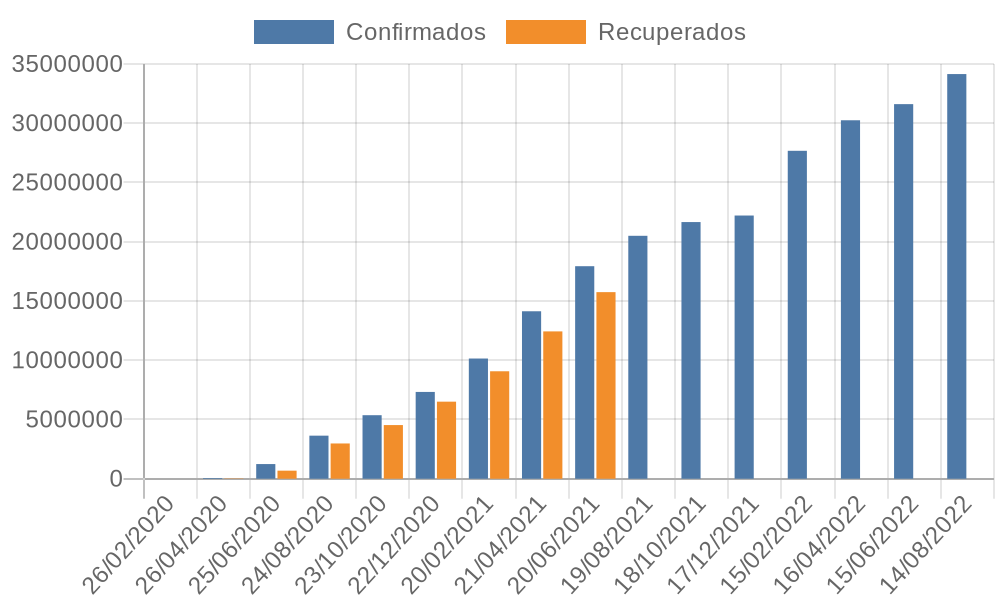

In [22]:
y_data_1 = []
for comments in end_data[1::60]:
    y_data_1.append (comments[CONFIRMADOS])
    
y_data_2 = []
for comments in end_data[1::60]:
    y_data_2.append (comments[RECUPERADOS])
    
labels = ['Confirmados', 'Recuperados']

x = []
for comments in end_data[1::60]:
    x.append (comments[DATA].strftime('%d/%m/%Y'))
    
chart = create_chart(x, [y_data_1, y_data_2], labels, title='Gráfico confirmados x recuperados')
chart_content = get_api_chart(chart)
save_image('meu_primeiro_grafico.png', chart_content)
display_image('meu_primeiro_grafico.png')

In [30]:
from urllib.parse import quote

In [31]:
def get_api_qrcode(link):
    text = quote(link) # parsing do link para url
    url_base = 'https://quickchart.io/qr'
    answer = library.get(f'{url_base}?text={text}')
    return answer.content

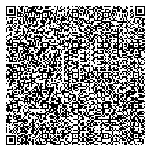

In [32]:
url_base= 'https://quickchart.io/chart'
link= f'{url_base}?c={str(chart)}'
save_image('qr_code.png', get_api_qrcode(link))
display_image('qr_code.png')